1. Tree-Based Methods
(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive
class and 171 columns, of which one is the class column. All attributes are numeric.

In [2]:
#!unzip data.zip

Archive:  data.zip
  inflating: aps_failure_test_set.csv  
  inflating: aps_failure_training_set.csv  


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [143]:
data_folder_path="../data/"
#data_folder_path=""
training_file = data_folder_path+"aps_failure_training_set.csv"
testing_file = data_folder_path+"aps_failure_test_set.csv"
training_data =  pd.read_csv(training_file, skiprows = 20,  na_values="na")
testing_data =  pd.read_csv(testing_file, skiprows = 20,  na_values="na")

In [144]:
data = pd.concat([training_data, testing_data])


In [145]:
print(data)

      class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_0

(b) Data Preparation

This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea

i. Research what types of techniques are usually used for dealing with data with
missing values.2 Pick at least one of them and apply it to this data in the
next steps

In [146]:
col_names = list(data.columns)
col_names.remove("class")
print(col_names)
print(len(col_names))

['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', '

In [147]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(data[col_names])
data[col_names] = imputer.transform(data[col_names])
print(data)

      class   aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg  76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg  33058.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
2       neg  41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg     12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg  60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...      ...     ...           ...     ...     ...     ...     ...   
15995   neg  81852.0     0.0  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg     18.0     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg  79636.0     0.0  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg    110.0     0.0  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg      8.0     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee

In [148]:
training_data = data[:60000]
testing_data =  data[60000:]

In [149]:
print(training_data)
print(testing_data)

      class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058.0     0.0  0.000000e+00   128.0     0.0     0.0     0.0   
2       neg   41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...       ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002.0     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286.0     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292.0     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222.0     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    

In [50]:
'''
for col in col_names:
    temp_col = list(set(col_names) - set([col]))
    temp_col.sort()
    model = linear_model.LinearRegression()
    model.fit(data[temp_col], data[col])
    data[data[col].isna(), col ] = model.predict(data[temp_col])'''

'\nfor col in col_names:\n    temp_col = list(set(col_names) - set([col]))\n    temp_col.sort()\n    model = linear_model.LinearRegression()\n    model.fit(data[temp_col], data[col])\n    data[data[col].isna(), col ] = model.predict(data[temp_col])'

ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [150]:
coeff_var={}
for i in col_names:
    coeff_var[i] = training_data[i].std()/ training_data[i].mean()
print(coeff_var)

{'aa_000': 2.4509375779439706, 'ab_000': 10.38349386661712, 'ac_000': 2.310240654096724, 'ad_000': 244.32197197498292, 'ae_000': 24.200136597496268, 'af_000': 19.47129505628922, 'ag_000': 92.91775503614396, 'ag_001': 35.24931353570071, 'ag_002': 17.565907132841456, 'ag_003': 8.64740247592642, 'ag_004': 5.463065711086688, 'ag_005': 2.95620757712272, 'ag_006': 2.3568206503843214, 'ag_007': 2.858973855932602, 'ag_008': 6.221497044241202, 'ag_009': 33.357567468909096, 'ah_000': 2.311701268089559, 'ai_000': 18.20380626400147, 'aj_000': 44.26599598906831, 'ak_000': 80.42497540911697, 'al_000': 9.173106315335758, 'am_0': 9.15522140450663, 'an_000': 2.249962057493394, 'ao_000': 2.270642369643201, 'ap_000': 3.08108900505628, 'aq_000': 2.8568597738477264, 'ar_000': 11.354346512819774, 'as_000': 87.33249956491983, 'at_000': 23.70818671056468, 'au_000': 68.88275094860585, 'av_000': 6.0058340084913775, 'ax_000': 4.019051103714365, 'ay_000': 37.428284710693916, 'ay_001': 52.82471400359084, 'ay_002':

iii. Plot a correlation matrix for your features using pandas or any other tool.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


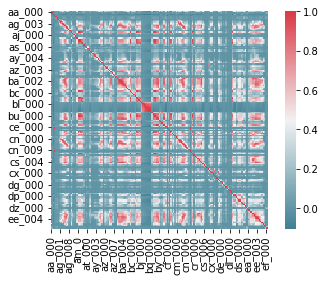

In [151]:
corr = training_data.loc[:,col_names].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

iv. Pick floor(√170) features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [152]:
sorted_cv = dict(sorted(coeff_var.items(), key = lambda x:x[1], reverse = True)[:math.floor(170**0.5)])
print(len(sorted_cv))
print(sorted_cv)

13
{'cf_000': 244.88751656677871, 'co_000': 244.50738505363307, 'ad_000': 244.32197197498292, 'cs_009': 237.93055371550008, 'dh_000': 123.21609721751098, 'dj_000': 117.49422514496881, 'ag_000': 92.91775503614396, 'as_000': 87.33249956491983, 'ay_009': 84.73373459934407, 'ak_000': 80.42497540911697, 'az_009': 77.83854428844978, 'ch_000': 77.45385713442391, 'au_000': 68.88275094860585}


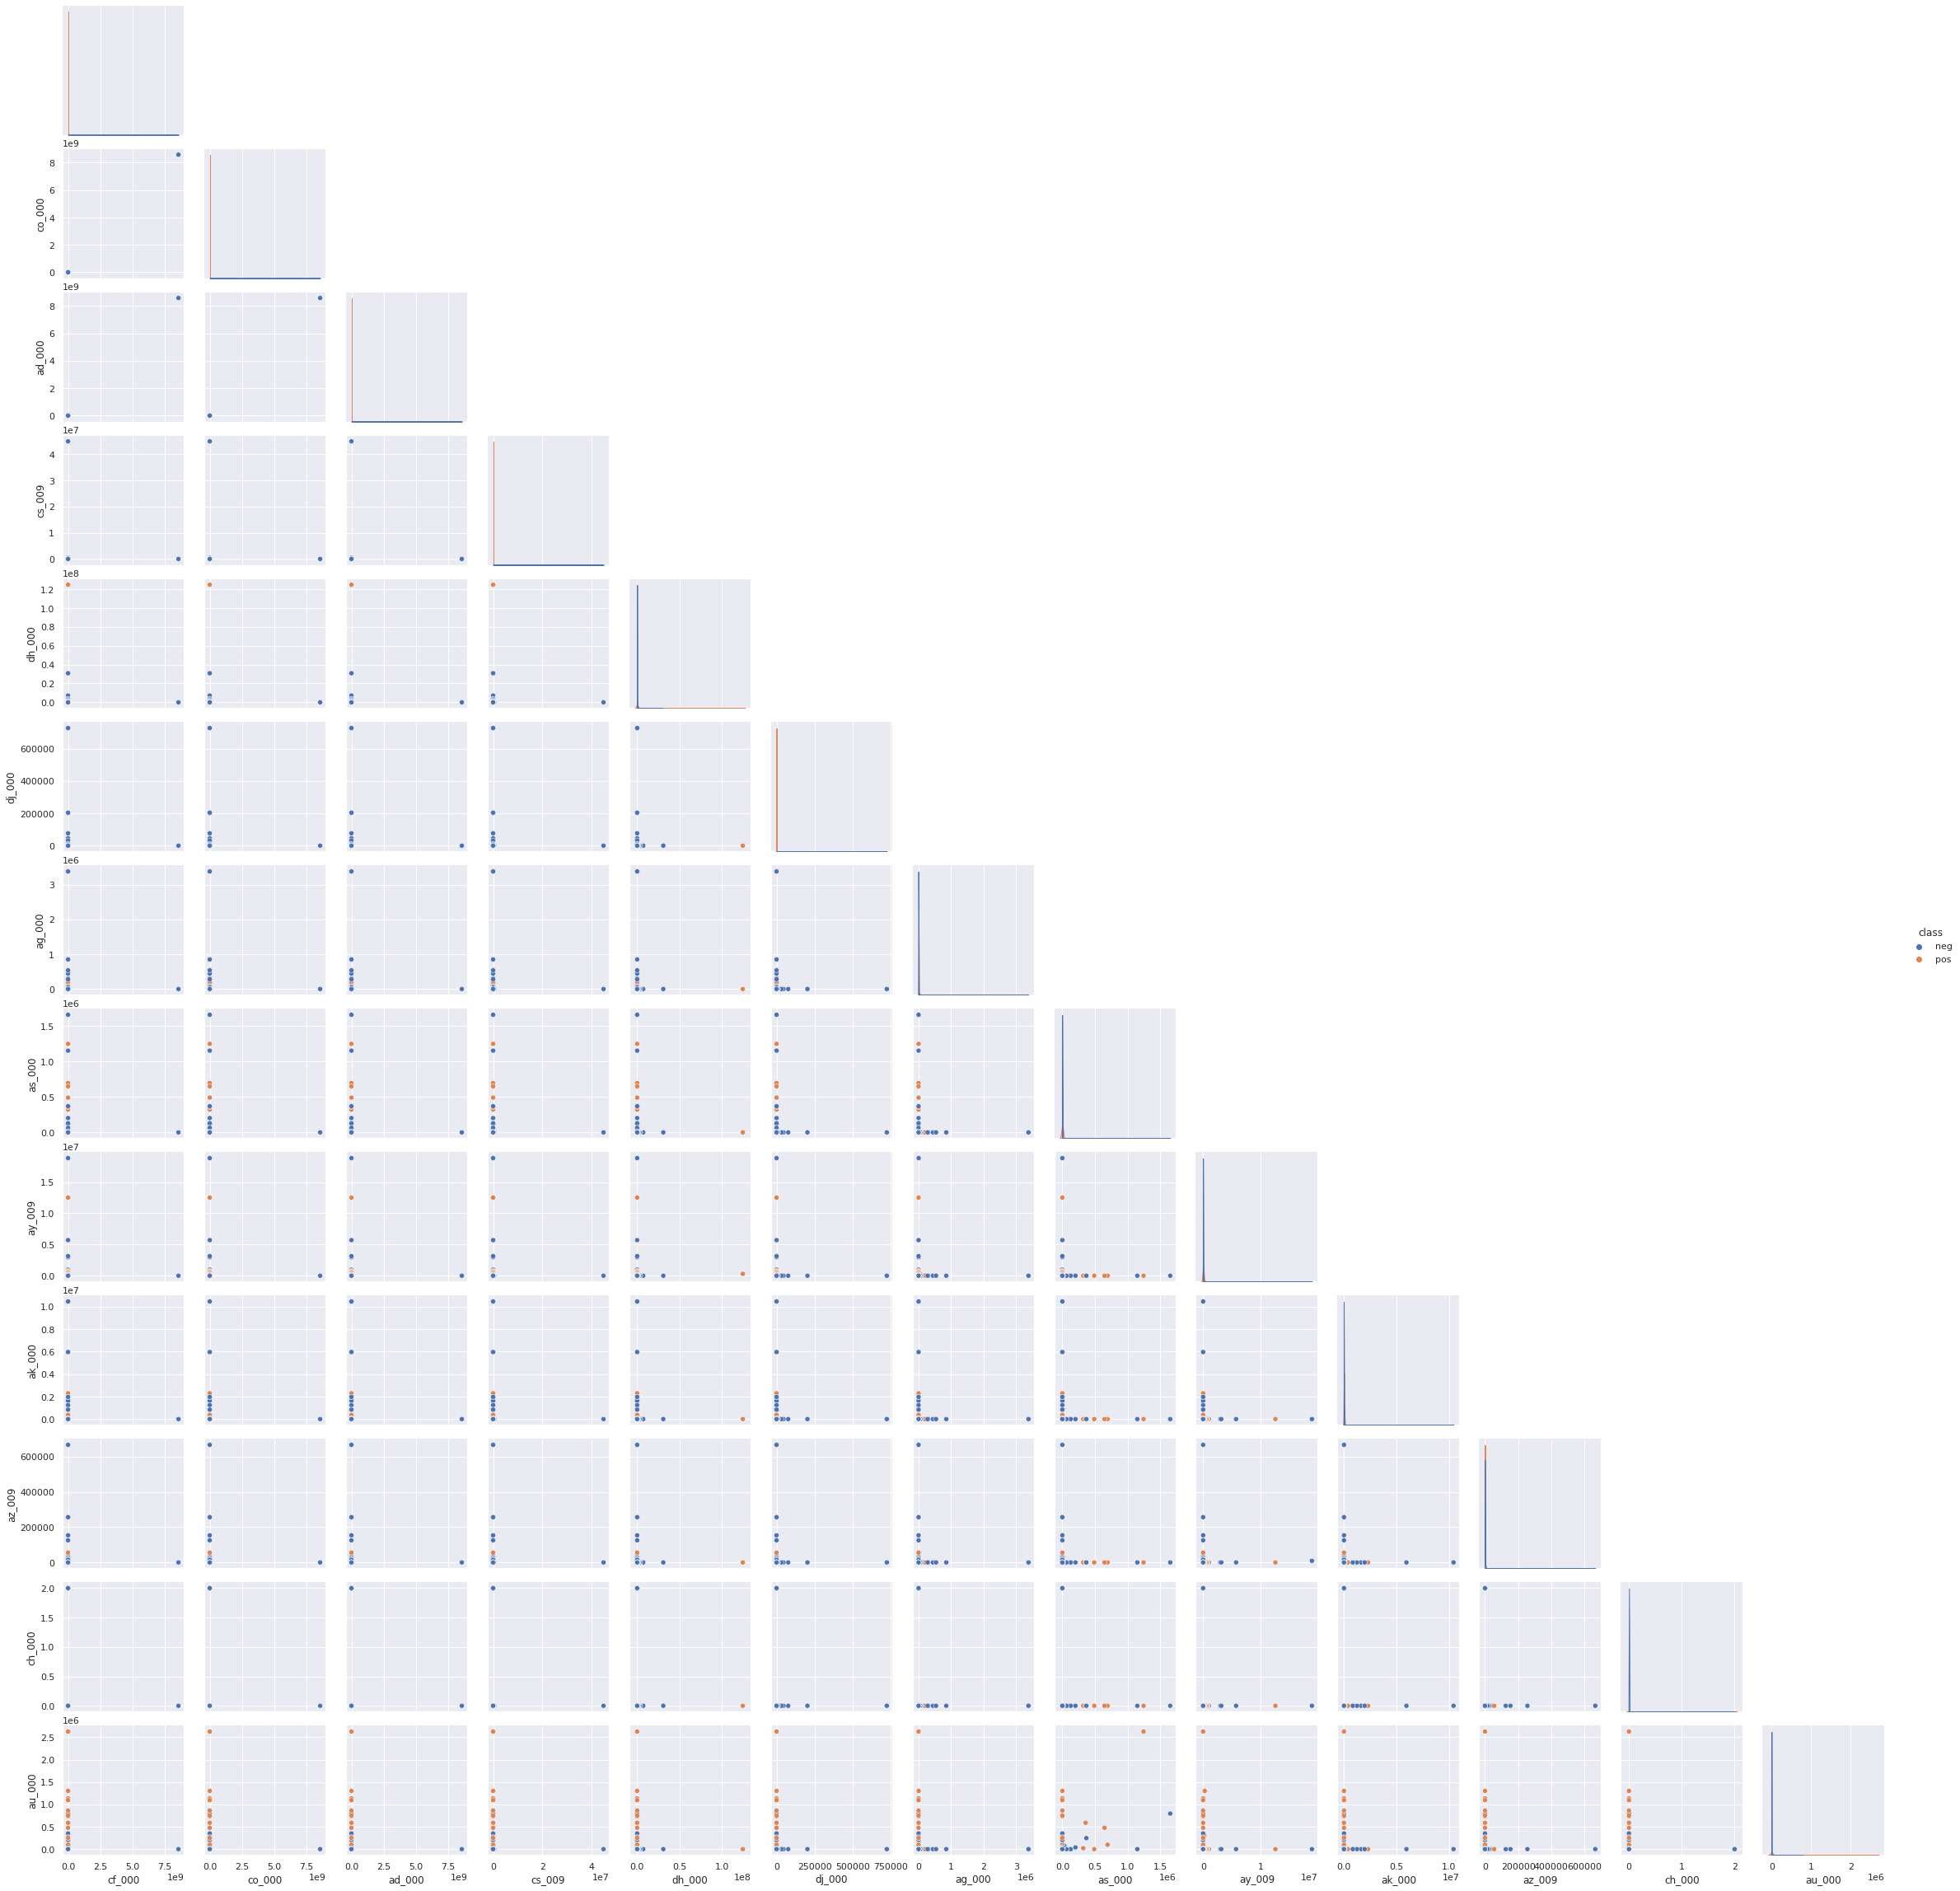

In [12]:
sns.set()
sns.pairplot(training_data,vars=list(sorted_cv.keys()), corner=True, hue='class')
#sns.load_dataset("iris")
#sns.pairplot(iris, corner=True)

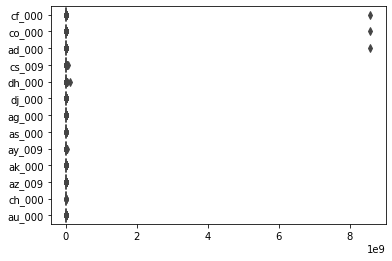

In [19]:
sns.boxplot( data=training_data[sorted_cv.keys()], orient='h')

plt.show()

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [153]:
#print(count(data[data["class"]=="pos"]))
print("\n\nTotal data - \n", data["class"].value_counts(),
"\n\nTraining data - \n", training_data["class"].value_counts(),
"\n\nTesting data - \n", testing_data["class"].value_counts())



Total data - 
 neg    74625
pos     1375
Name: class, dtype: int64 

Training data - 
 neg    59000
pos     1000
Name: class, dtype: int64 

Testing data - 
 neg    15625
pos      375
Name: class, dtype: int64


The above numbers show that data is highly imbalanced

(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score
label = ["pos","neg"]
d = {'pos': 0, 'neg': 1}
train_01 = training_data["class"].map(d)
test_01 = testing_data["class"].map(d)
def plot_roc(model, training_dataX, training_dataY , test_dataX, test_dataY, label, mapping_dict):
    prediction_probab = model.predict_proba(test_dataX)[::,1]
    #test_01 = test_dataY.map(mapping_dict)
    fpr, tpr, limit = roc_curve(test_dataY, prediction_probab)
    auc_score= roc_auc_score(test_dataY, prediction_probab)
    print("AUC = "+str(auc_score))

    print("out of bag error = ",1-model.oob_score_ )
    plt.plot(fpr,tpr,label="AUC = "+str(auc_score))
    plt.ylabel=("TPR")
    plt.xlabel=("FPR")
    plt.legend()
    plt.show()

def predict(model, training_dataX, training_dataY , test_dataX, test_dataY, label, mapping_dict):
    #model = model.fit(training_dataX, training_dataY)
    prediction = model.predict(test_dataX)
    cm = confusion_matrix(test_dataY, prediction, labels =  [0,1])
    cmd = ConfusionMatrixDisplay(cm, display_labels=label)
    cmd.plot()
    print("\n")
    

In [182]:
test_01 = testing_data["class"].map(d)
train_01 = training_data["class"].map(d)
print(len(train_01[train_01==0]), len(train_01[train_01==1]))
print(len(test_01[test_01==0]), len(test_01[test_01==1]))

1000 59000
375 15625


In [174]:
#ref: https://towardsdatascience.com/a-practical-guide-to-implementing-a-random-forest-classifier-in-python-979988d8a263
from sklearn.ensemble import RandomForestClassifier
train_01 = training_data["class"].map(d)
rf = RandomForestClassifier(oob_score=True).fit(training_data[col_names], train_01)

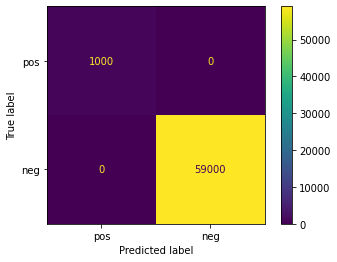

In [185]:
predict(rf, training_data[col_names], train_01, training_data[col_names], train_01, label, d)

AUC = 1.0
out of bag error =  0.005950000000000011


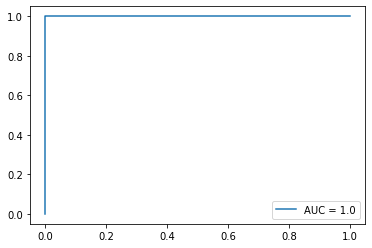

In [187]:
plot_roc(rf, training_data[col_names], train_01, training_data[col_names], train_01, label, d)

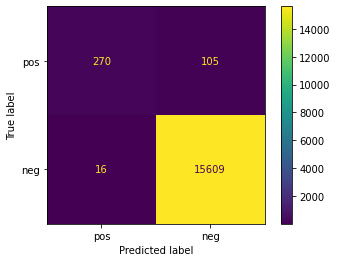

In [188]:
predict(rf, training_data[col_names], train_01, testing_data[col_names], test_01, label, d)

AUC = 0.9943491413333333
out of bag error =  0.005950000000000011


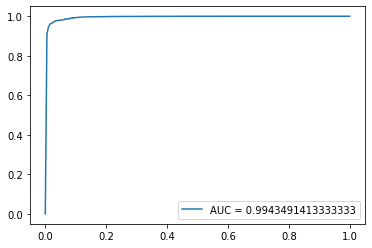

In [189]:
plot_roc(rf, training_data[col_names], train_01, testing_data[col_names], test_01, label, d)

(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 1c. Compare the results with
those of 1c.

In [192]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
rf_balanced = RandomForestClassifier(class_weight="balanced", oob_score=True).fit(training_data[col_names], train_01)


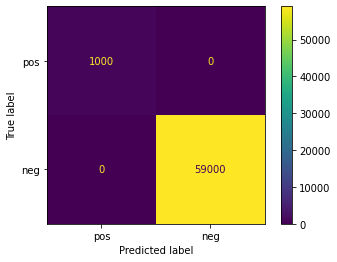

In [193]:
predict(rf_balanced, training_data[col_names], train_01, training_data[col_names], train_01, label, d)

AUC = 1.0
out of bag error =  0.00773333333333337


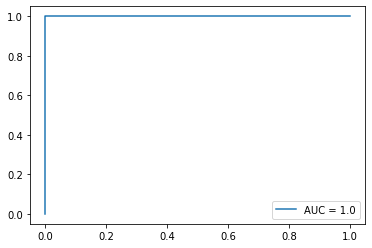

In [194]:
plot_roc(rf_balanced, training_data[col_names], train_01, training_data[col_names], train_01, label, d)

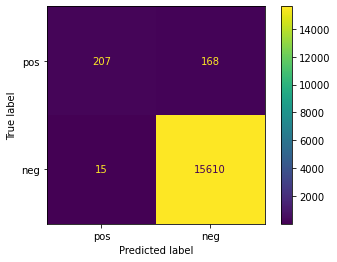

In [195]:
predict(rf_balanced, training_data[col_names], train_01, testing_data[col_names], test_01, label, d)

AUC = 0.9929966933333334
out of bag error =  0.00773333333333337


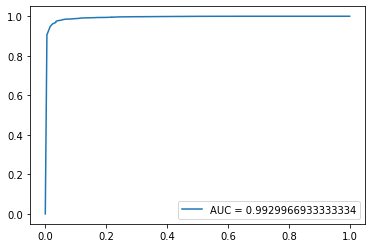

In [196]:
plot_roc(rf_balanced, training_data[col_names], train_01, testing_data[col_names], test_01, label, d)

There is a slight change in the accuracy, but it doesnt improve


(e) XGBoost and Model Trees

In the case of a univariate tree, only one input dimension is used at a tree split.

In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general.

In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule.

In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has PjβjXj > s. as the decision rule). 

Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.

One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree.
Determine α (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error.

Report the Confusion Matrix, ROC,
and AUC for training and test sets

In [66]:
from sklearn.model_selection import RepeatedKFold, StratifiedKFold, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import xgboost  
cv_scores={}
alphasl = [10 ** i for i in range(-5, 6)]
d = {'pos': 0, 'neg': 1}
n_folds = 5

print(training_data["class"].value_counts())
print(testing_data["class"].value_counts())
test_01 = testing_data["class"].map(d)
train_01 = training_data["class"].map(d)
print(len(train_01[train_01==0]), len(train_01[train_01==1]))
print(len(test_01[test_01==0]), len(test_01[test_01==1]))

neg    59000
pos     1000
Name: class, dtype: int64
neg    15625
pos      375
Name: class, dtype: int64
1000 59000
375 15625


In [197]:
param = {'C': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000]}
cross_validator = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=69)
xgb_model = xgboost.XGBClassifier(objective='binary:logistic', oob_score=True)
gridSearchCV = GridSearchCV(estimator = xgb_model,param_grid=param, cv=cross_validator, n_jobs = 10 , scoring='roc_auc') 
gridSearchCV.fit(training_data[col_names], train_01)
print(gridSearchCV.best_estimator_)
prediction = gridSearchCV.predict(testing_data[col_names])

XGBClassifier(C=0.0001, oob_score=True)


In [70]:
print(gridSearchCV.best_params_)
xgb_model2 = gridSearchCV.best_estimator_
train_prediction = xgb_model2.predict(training_data[col_names])
print(train_prediction)
test_prediction = xgb_model2.predict(testing_data[col_names])
print(test_prediction)
print(len(train_prediction[train_prediction==1]), len(train_prediction[train_prediction==0]))
print(len(test_prediction[test_prediction==1]), len(test_prediction[test_prediction==0]))

{'C': 0.0001}
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
59191 809
15724 276


In [73]:
print(len(train_01[train_01==1]), len(train_01[train_01==0]))
print(len(test_01[test_01==1]), len(test_01[test_01==0]))
print(len(train_prediction[train_prediction==1]), len(train_prediction[train_prediction==0]))
print(len(test_prediction[test_prediction==1]), len(test_prediction[test_prediction==0]))

59000 1000
15625 375
59191 809
15724 276


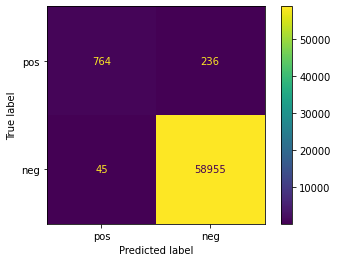

In [77]:
cm = confusion_matrix(train_01, train_prediction, labels = [0,1])
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot()


AUC = 0.9954668644067797


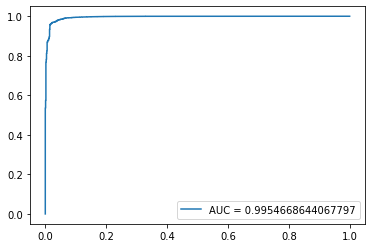

In [200]:
prediction_probab = xgb_model2.predict_proba(training_data[col_names])[::,1]
fpr, tpr, limit = roc_curve(train_01, prediction_probab)
auc_score= roc_auc_score(train_01, prediction_probab)
print("AUC = "+str(auc_score))


plt.plot(fpr,tpr,label="AUC = "+str(auc_score))
plt.ylabel=("TPR")
plt.xlabel=("FPR")
plt.legend()
plt.show()

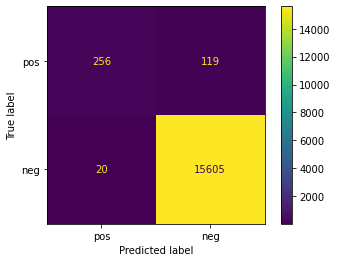

In [79]:
cm = confusion_matrix(test_01, test_prediction, labels = [0,1])
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot()

AUC = 0.9950161920000001


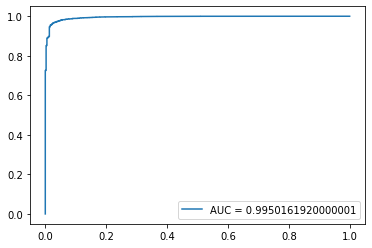

In [122]:
prediction_probab = xgb_model2.predict_proba(testing_data[col_names])[::,1]
fpr, tpr, limit = roc_curve(test_01, prediction_probab)
auc_score= roc_auc_score(test_01, prediction_probab)
print("AUC = "+str(auc_score))

plt.plot(fpr,tpr,label="AUC = "+str(auc_score))
plt.ylabel=("TPR")
plt.xlabel=("FPR")
plt.legend()
plt.show()

There is an improvemennt in the accuracy compared to random forests and weighted random forests

From 1f and 2-5 , please find solutions in the notebook Narsidani_Shenaz_HW6_part2.ipynb